In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import seaborn as sb
sb.set_style('darkgrid')

from glob import glob
import matplotlib.pyplot as plt
import os
import random
import cv2

import gzip
import nibabel as nb

# https://carpentries-incubator.github.io/SDC-BIDS-IntroMRI/aio/index.html

In [2]:
mask_files = glob('/Volumes/DISK_IMG/10*/*T1w.npy.gz')
print(mask_files)

['/Volumes/DISK_IMG/100206/m100206_T1w.npy.gz', '/Volumes/DISK_IMG/100307/m100307_T1w.npy.gz', '/Volumes/DISK_IMG/100610/m100610_T1w.npy.gz', '/Volumes/DISK_IMG/101006/m101006_T1w.npy.gz', '/Volumes/DISK_IMG/101107/m101107_T1w.npy.gz']


In [3]:
# f = gzip.GzipFile(mask_files[2], "r") # file type is now gzip.GzipFile
# data = np.load(f)

In [6]:
# np.shape(data)

(256, 320, 320)

In [ ]:
# converting images from .npy.gz to .nii.gz
# img = nb.Nifti1Image(data,None)
# img.header.get_xyzt_units()
# img.to_filename(os.path.join('build','/Volumes/DISK_IMG/100206/m100206_T1w.nii.gz'))  # Save as NiBabel file
# t1_img = nb.load("/Volumes/DISK_IMG/100206/m100206_T1w.nii.gz")

In [5]:
# trying to load all of them into images together
images = []
for i in range(len(mask_files)):
    f = gzip.GzipFile(mask_files[i], "r") # file type is now gzip.GzipFile
    data = np.load(f)
    img = nb.Nifti1Image(data,None)
    img.header.get_xyzt_units()
    img.to_filename(os.path.join('build', mask_files[i].replace('.npy','.nii')))  # Save as NiBabel file
    images.append(nb.load(mask_files[i].replace('.npy','.nii')))


In [6]:
type(images[i])

nibabel.nifti1.Nifti1Image

In [7]:
t1_hdr = []
t1_data = []
for i in range(len(images)):
    t1_hdr.append(images[i].header);
    t1_data.append(images[i].get_fdata()); #same data as before!!
    print("Shape of MRI #" + str(i+1) + " = " + str(t1_data[i].shape))

Shape of MRI #1 = (256, 320, 320)
Shape of MRI #2 = (256, 320, 320)
Shape of MRI #3 = (256, 320, 320)
Shape of MRI #4 = (256, 320, 320)
Shape of MRI #5 = (256, 320, 320)


Let's explore our T1 MRI: first, the header

In [81]:
# t1_hdr = t1_img.header;
# # print(t1_hdr)
# t1_hdr.keys();
# t1_data = t1_img.get_fdata() #same data as before!!

In [84]:
# print("Dimensions = "+ str(t1_data.ndim))
# print("Shape = "+ str(t1_data.shape))
# print("Data type = " + str(t1_data.dtype))

Dimensions = 3
Shape = (256, 320, 320)
Data type = float64


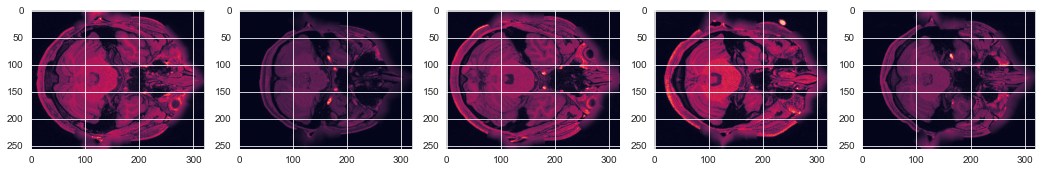

In [86]:
f = plt.subplots(1,5,figsize=(18,18))
for i in range(len(images)):
    z_slice = t1_data[i][:,:,100]
    plt.subplot(1,5,i+1)
    plt.imshow(z_slice)
    
# z_slice = t1_data[1][:, :, 100]
# plt.imshow(z_slice, cmap="gray")

In [78]:
# if not all values here are 0, the data has been copied succesfully!!
t1_data[2] - t1_data[1]

array([[[ 7.51781464e+00, -7.37674713e+00,  2.68260250e+01, ...,
          1.20983238e+01, -1.62077389e+01,  0.00000000e+00],
        [-2.12916842e+01, -2.45020180e+01,  2.24156189e+00, ...,
         -4.03405857e+00, -3.11197357e+01,  0.00000000e+00],
        [ 1.17829103e+01, -4.37047472e+01, -2.33303413e+01, ...,
          3.00259142e+01,  3.56965609e+01,  0.00000000e+00],
        ...,
        [ 1.17705536e+00, -2.18493786e+01, -8.75318050e+00, ...,
         -2.97152920e+01,  1.15020070e+01,  0.00000000e+00],
        [-1.22735405e+00, -2.89204340e+01, -5.92154884e+00, ...,
          2.38507528e+01, -4.37538557e+01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-1.26552010e+01,  1.60800343e+01, -2.23421574e+01, ...,
          4.64485550e+00, -1.22612572e+01,  0.00000000e+00],
        [-2.23506393e+01, -3.17079067e+00,  9.74994659e+00, ...,
          3.95619469e+01, -8.49620819e

Let's now look at the SOS maps

In [79]:
sos_files = glob('/Volumes/DISK_IMG/10*/*Vp.npy.gz')

sos_images = []
for i in range(len(sos_files)):
    f = gzip.GzipFile(sos_files[i], "r") # file type is now gzip.GzipFile
    data = np.load(f)
    img = nb.Nifti1Image(data,None)
    img.header.get_xyzt_units()
    img.to_filename(os.path.join('build', sos_files[i].replace('.npy','.nii')))  # Save as NiBabel file
    sos_images.append(nb.load(sos_files[i].replace('.npy','.nii')))

In [88]:
sos_hdr = []
sos_data = []
for i in range(len(images)):
    sos_hdr.append(sos_images[i].header);
    sos_data.append(sos_images[i].get_fdata()); #same data as before!!
    print("Shape of SOS Map #" + str(i+1) + " = " + str(sos_data[i].shape))

Shape of SOS Map #1 = (256, 320, 320)
Shape of SOS Map #2 = (256, 320, 320)
Shape of SOS Map #3 = (256, 320, 320)
Shape of SOS Map #4 = (256, 320, 320)
Shape of SOS Map #5 = (256, 320, 320)


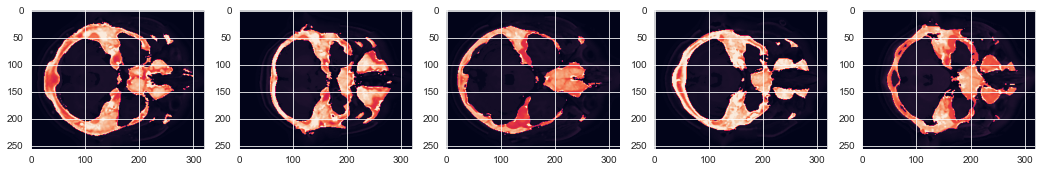

In [89]:
f = plt.subplots(1,5,figsize=(18,18))
for i in range(len(sos_images)):
    z_slice = sos_data[i][:,:,100]
    plt.subplot(1,5,i+1)
    plt.imshow(z_slice)
    

Both Together:

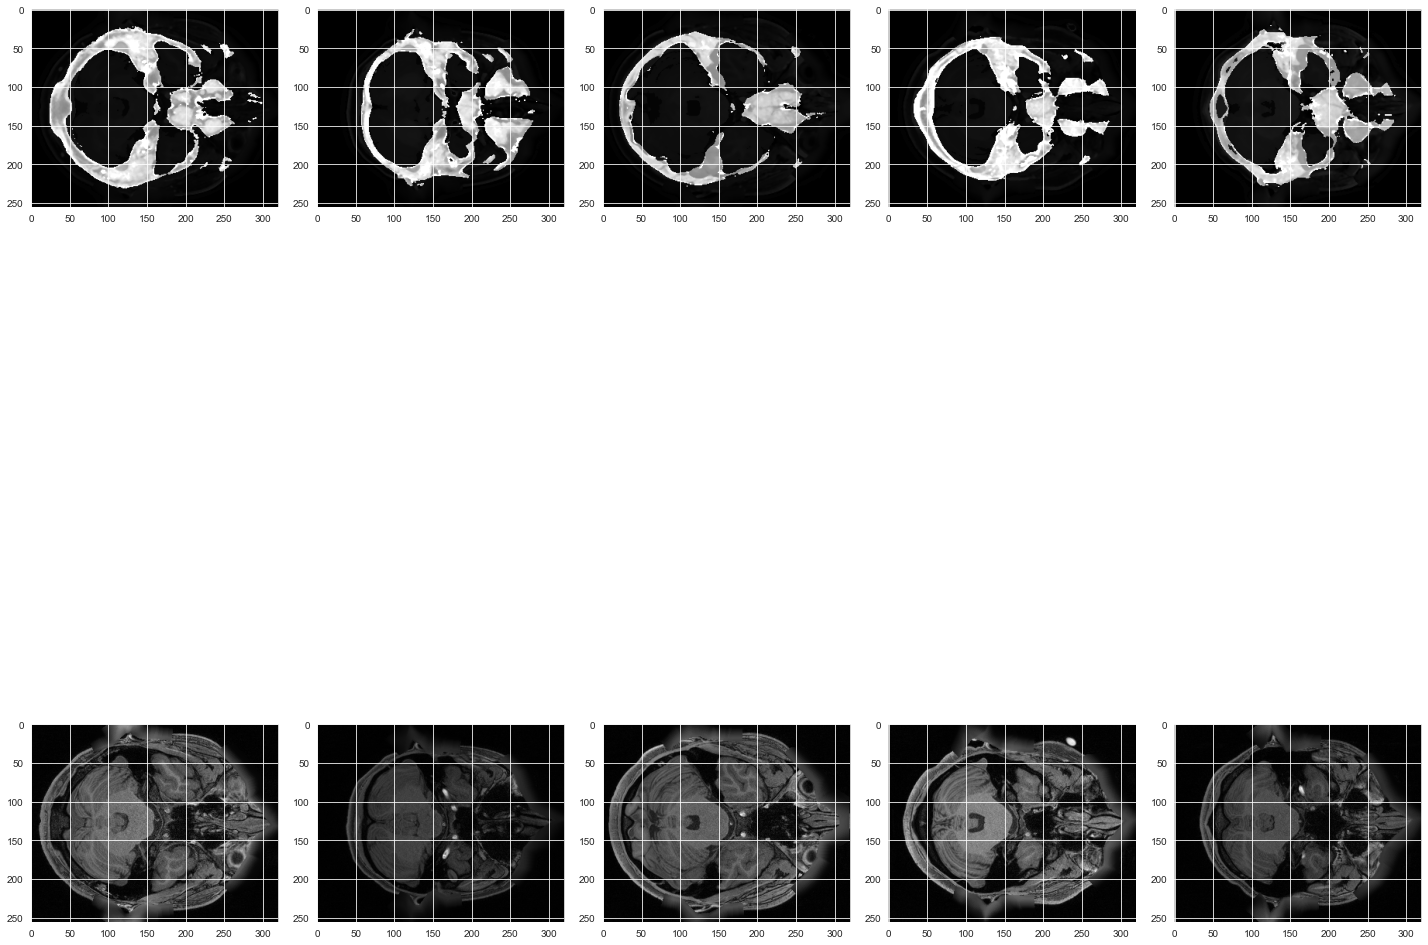

In [102]:
f = plt.subplots(2,5,figsize=(20,20))
plt.tight_layout()
for i in range(len(sos_images)):
    z_slice = sos_data[i][:,:,100]
    plt.subplot(2,5,i+1)
    plt.imshow(z_slice, cmap="gray")

    z_slice = t1_data[i][:,:,100]
    plt.subplot(2,5,i+6)
    plt.imshow(z_slice, cmap="gray")